In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from seisflows.seistools.susignal import source_time_function
from scipy.linalg import toeplitz, inv
from scipy.signal import correlate, deconvolve, convolve

In [2]:
dt = 0.01
t = np.arange(0, 3, dt)
t0 = [0.75, 1.75, 2.4]
f0 = [5, 5 ,5]
shifts = [-0.05, 0.1, -0.25]
factor = [3, 0, 0]

phases = zip(t0, f0, shifts, factor)

d = np.zeros(len(t))
s = np.zeros(len(t))

for phase in phases:
    print phase[0], phase[1]
    d += source_time_function(t, phase[0], phase[1], factor=phase[3])
    s += source_time_function(t, phase[0]-phase[2], phase[1], factor=phase[3])


0.75 5
1.75 5
2.4 5


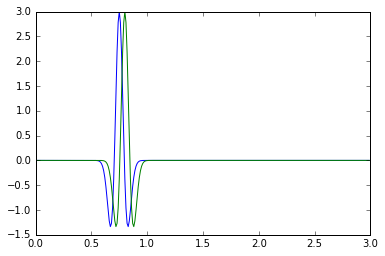

In [3]:
# plot data and synthetics
plt.plot(t, d)
plt.plot(t, s)

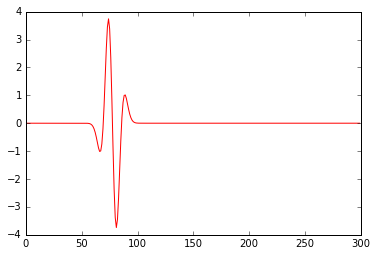

In [4]:
# plot residuals
plt.plot(d-s, 'red')

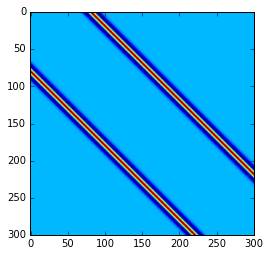

In [5]:
P = toeplitz(s)
plt.imshow(P)

In [6]:
c = correlate(d, s)
ac = correlate(s, s)

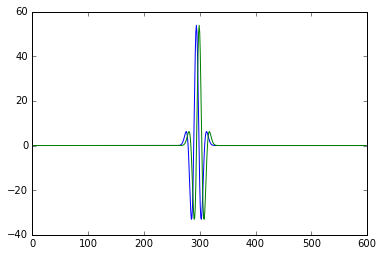

In [8]:
plt.plot(c)
plt.plot(ac)

In [9]:
dc = deconvolve(c, ac)
plt.plot(dc)

ValueError: BUG: filter coefficient a[0] == 0 not supported yet

In [10]:
# solve LSQ problem
mu = 10
PT = P.transpose()
LHS = np.matmul(PT, P) + mu * np.eye(len(s))
w = np.matmul(inv(LHS), np.matmul(PT, d))

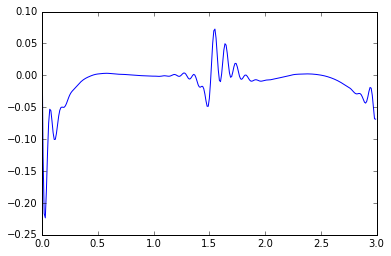

In [11]:
plt.plot(t, w)

In [ ]:
plt.plot(t, np.matmul(P,w))
plt.plot(t, d)

In [20]:
spike = np.zeros(len(t))
spike[100] = 1

In [33]:
cspike = np.matmul(P, spike)
cspike2 = convolve(spike, s)
len(cspike2)

599

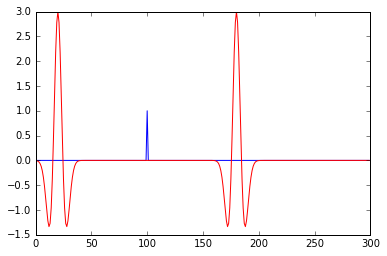

In [35]:
plt.plot(spike)
plt.plot(cspike, 'r')


In [19]:
len(t)


300